In [ ]:
#Question 1

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import numpy as np


pd.__version__

'0.25.0'

In [3]:
#Question 2

In [4]:
df1=pd.read_csv("Csv1.csv")
df2=pd.read_csv("Csv2.csv")


In [5]:
#Question 3

In [6]:
df=pd.merge(df1, df2, how='inner', on='ID')

In [7]:
#Question 4

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 15 columns):
Address.City_x                        108 non-null object
ID                                    108 non-null int64
LocationMilestones.LastRemodelDate    73 non-null object
LocationMilestones.OpenDate           108 non-null object
Name_x                                108 non-null object
Store.StoreDistrictID                 108 non-null int64
TimeZone.TimeZoneCode                 108 non-null object
PhoneNumber                           108 non-null object
Address.City_y                        108 non-null object
Name_y                                108 non-null object
FaxNumber                             103 non-null object
BeginTime.MF                          108 non-null object
ThruTime.MF                           108 non-null object
IsOpen.Sat                            108 non-null bool
IsOpen.Sun                            108 non-null bool
dtypes: bool(2), int64(2), objec

In [9]:
df.columns.values

array(['Address.City_x', 'ID', 'LocationMilestones.LastRemodelDate',
       'LocationMilestones.OpenDate', 'Name_x', 'Store.StoreDistrictID',
       'TimeZone.TimeZoneCode', 'PhoneNumber', 'Address.City_y', 'Name_y',
       'FaxNumber', 'BeginTime.MF', 'ThruTime.MF', 'IsOpen.Sat',
       'IsOpen.Sun'], dtype=object)

In [10]:
#Question 5

In [11]:
df.rename(columns={'Name_x':'Store Name','Name_y':'Store Name' }, inplace=True)

In [12]:
#Question 6

In [13]:
df.isnull()

,Address.City_x,ID,LocationMilestones.LastRemodelDate,LocationMilestones.OpenDate,Store Name,Store.StoreDistrictID,TimeZone.TimeZoneCode,PhoneNumber,Address.City_y,Store Name,FaxNumber,BeginTime.MF,ThruTime.MF,IsOpen.Sat,IsOpen.Sun
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#Question 7a

In [15]:
from math import pi
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models import HoverTool

output_file('new_pie.html')
hey=df["IsOpen.Sat"].value_counts()


data=hey.reset_index(name='value').rename(columns={'index':'open'})
data['angle']=(data['value'])/data['value'].sum()*2*pi
#data['angle']=data['value']/data['value'].sum()*2*pi
data['color']=['Blue', 'Red']
data['value']=(data['value']*100)/data['value'].sum()

p=figure(plot_height=350, title='IsOpen Sat', toolbar_location=None, 
         tools='hover', tooltips='@open:@value', x_range=(-0.5,1.0))

p.wedge(x=0, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True),
        end_angle=cumsum('angle'), line_color="white", fill_color='color', legend='open', source=data)



hover=HoverTool(tooltips=[('open','@open'),("value",'[@value]')])
p.add_tools(hover)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color=None

show(p)


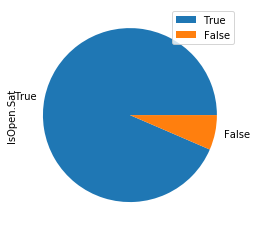

In [16]:
(df["IsOpen.Sat"]).value_counts().plot(kind="pie", legend=True)

In [17]:
#Question 7b

In [18]:
from math import pi
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models import HoverTool

output_file('new_pie.html')
hey=df["IsOpen.Sun"].value_counts()


data=hey.reset_index(name='value').rename(columns={'index':'open'})
data['angle']=(data['value'])/data['value'].sum()*2*pi
#data['angle']=data['value']/data['value'].sum()*2*pi
data['color']=['Blue', 'Green']
data['value']=(data['value']*100)/data['value'].sum()

p=figure(plot_height=350, title='IsOpen Sun', toolbar_location=None, 
         tools='hover', tooltips='@open:@value', x_range=(-0.5,1.0))

p.wedge(x=0, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True),
        end_angle=cumsum('angle'), line_color="white", fill_color='color', legend='open', source=data)



hover=HoverTool(tooltips=[('open','@open'),("value",'[@value]')])
p.add_tools(hover)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color=None

show(p)


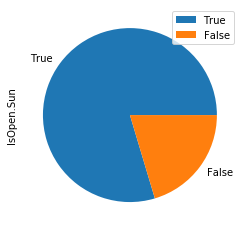

In [21]:
(df["IsOpen.Sun"]).value_counts().plot(kind="pie", legend=True)

In [25]:
#Question 8

In [26]:
close_by_eleven=[]
new=df[df['ThruTime.MF']=="23:00:00"]["ID"]


close_by_eleven.append(new)
close_by_eleven

[4      1179
 9      1772
 12     1400
 14     1546
 15     2796
 17     2503
 21     1461
 22     2137
 23      373
 24     1964
 26      981
 27     2171
 29     1197
 30     1486
 31     2333
 32     2121
 35     2036
 36     1390
 40      970
 45     2056
 48     1206
 53     1367
 57     1346
 60     1302
 61     1453
 73     2208
 74      844
 77     1090
 80     2360
 82      686
 84     1370
 85      695
 86      151
 87     1983
 93      146
 94     1182
 95     2240
 100    1937
 103    1376
 107    1807
 Name: ID, dtype: int64]

In [ ]:
#Question 9

In [29]:
store_ID=df['ID']
last_remodel_date=df["LocationMilestones.LastRemodelDate"].dropna()

dict(zip(store_ID,last_remodel_date))

{2153: '2013-06-27T12:00:00',
 1499: '2004-10-17T12:00:00',
 1073: '2013-10-10T12:00:00',
 1223: '2014-04-03T12:00:00',
 1179: '2007-10-18T12:00:00',
 2129: '2012-06-21T12:00:00',
 1825: '2004-08-08T12:00:00',
 1172: '2013-06-27T12:00:00',
 2274: '2012-03-22T12:00:00',
 1772: '2012-03-22T12:00:00',
 778: '2012-03-22T12:00:00',
 1773: '2012-06-21T12:00:00',
 1400: '2012-06-21T12:00:00',
 2276: '2017-03-30T12:00:00',
 1546: '2012-06-21T12:00:00',
 2796: '2013-03-21T12:00:00',
 1164: '2013-10-10T12:00:00',
 2503: '2012-03-22T12:00:00',
 1165: '2004-09-19T12:00:00',
 2355: '2012-03-22T12:00:00',
 2091: '2000-03-01T12:00:00',
 1461: '2017-10-26T12:00:00',
 2137: '2012-06-21T12:00:00',
 373: '2012-10-11T12:00:00',
 1964: '2013-06-27T12:00:00',
 2375: '2012-06-21T12:00:00',
 981: '2017-03-30T12:00:00',
 2171: '2012-03-22T12:00:00',
 969: '2017-10-26T12:00:00',
 1197: '2007-04-13T12:00:00',
 1486: '2017-03-30T12:00:00',
 2333: '2012-10-11T12:00:00',
 2121: '2012-03-22T12:00:00',
 1780: '2012-0

In [ ]:
#Question 10

In [31]:
city=df.groupby('Address.City_x')
len(city)

85

In [32]:
city=df.groupby('Address.City_y')
len(city)

85

In [34]:
#Question 11

In [35]:
pd.date_range(start='2000-01-01', end='2018-12-12', freq="AS")

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')